# Nonlinear Least Squares Optimization for Multi-Exponential Decay Models

Name: John Hodge

Date: 04/21/24

Non-linear system optimization using nonlinear least squares is a common technique used in various fields such as engineering, economics, and physics to fit a model to a set of data points. One illustrative example is the estimation of parameters in the exponential decay model, which is frequently used in physics and chemistry to describe how the intensity of a phenomenon decreases over time.

### Exponential Decay Model Example

Consider a scenario where you have observed data from a process that follows exponential decay, such as radioactive decay or the discharge of a capacitor in an RC circuit. The exponential decay model can be described by the following equation:

$ y(t) = A \exp(-\lambda t) + \epsilon $

Where:
- $ y(t) $ is the observed value at time \( $t$ \),
- $ A $ is the initial intensity or amount,
- $ \lambda $ is the decay constant,
- $ \epsilon $ is the error term, which is usually assumed to be normally distributed.

The goal is to estimate the parameters \( $A$ \) and \( $\lambda$ \) that best fit the observed data. This is done by minimizing the sum of the squares of the residuals, where residuals are the differences between the observed values and the values predicted by the model.

### Nonlinear Least Squares Optimization

To perform the nonlinear least squares optimization:

1. **Define the Objective Function**: The objective function $F(A, \lambda)$ is defined as the sum of the squared differences between observed values \( $y_i$ \) and modeled values $\hat{y}_i(A, \lambda)$:

   $ F(A, \lambda) = \sum_{i=1}^{n} [y_i - A \exp(-\lambda t_i)]^2 $

2. **Choose Initial Guesses**: Start with initial guesses for \( $A$ \) and \( $\lambda$ \). The accuracy of initial guesses can significantly affect the convergence of the optimization algorithm.

3. **Optimization Algorithm**: Use an optimization algorithm like the Levenberg-Marquardt algorithm, which is well-suited for nonlinear least squares problems. This algorithm iteratively adjusts \( $A$ \) and \( $\lambda$ \) to find the minimum of $F(A, \lambda)$.

4. **Convergence**: The optimization process continues until it converges, meaning that changes in the parameters no longer significantly reduce $F(A, \lambda)$, or until a maximum number of iterations is reached.

5. **Result**: The output is the estimated values of \( $A$ \) and \( $\lambda$ \) that provide the best fit to the data under the exponential decay model.

### Application Example

If you have data from a chemical reaction where the concentration of a reactant decreases over time, you could use this model and method to estimate the speed of the reaction and the initial concentration. This information could be crucial for scaling up the reaction for industrial production or for studying reaction kinetics in detail.

This example demonstrates how nonlinear least squares can be applied to real-world problems where the underlying relationships between variables are non-linear and the parameters of the model need to be estimated accurately to understand the system dynamics.

Next is a step-by-step tutorial on how to perform nonlinear least squares optimization using Python and the SciPy library. In this example, we'll use the exponential decay model described in the previous discussion. We'll fit this model to some synthetic data generated for this purpose.

## Install Necessary Libraries

First, ensure you have the necessary Python libraries installed. You can install them using pip if you haven't already:

In [44]:
!pip install numpy scipy matplotlib

## Import Libraries

Import the required modules in your Python script or notebook:

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Step 3: Generate Synthetic Data

For demonstration purposes, we'll create synthetic data using the exponential decay model with some added noise:

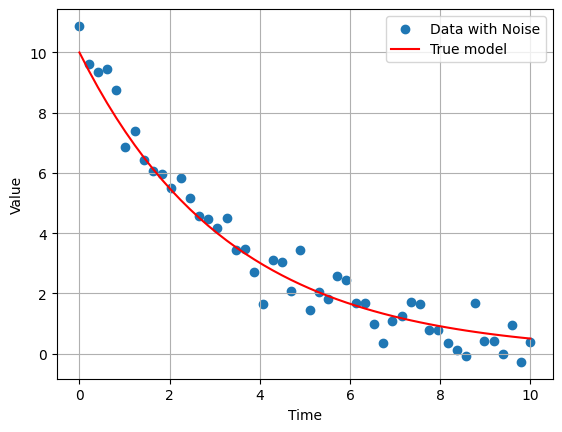

In [46]:
# Parameters
A_true = 10  # true amplitude
lambda_true = 0.3  # true decay constant

# Generate some data points
np.random.seed(0)
time = np.linspace(0, 10, 50)  # time from 0 to 10
y = A_true * np.exp(-lambda_true * time) + np.random.normal(0, 0.5, time.shape)  # model with noise

# Plot the data
plt.scatter(time, y, label='Data with Noise')
plt.plot(time, A_true * np.exp(-lambda_true * time), 'r-', label='True model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

## Define the Model Function

Define the exponential decay function that will be used to fit the data:

In [47]:
def exp_decay(t, A, lam):
    return A * np.exp(-lam * t)

## Perform Nonlinear Least Squares Optimization

Use curve_fit from SciPy to fit the model to your data:

In [48]:
# Initial guess for the parameters
initial_guess = [8, 0.1]

# Perform the curve fitting
params, cov = curve_fit(exp_decay, time, y, p0=initial_guess)

# Extract the parameters
A_est, lambda_est = params

## Evaluate and Visualize the Fit

Evaluate the fit and visualize it alongside the original data:

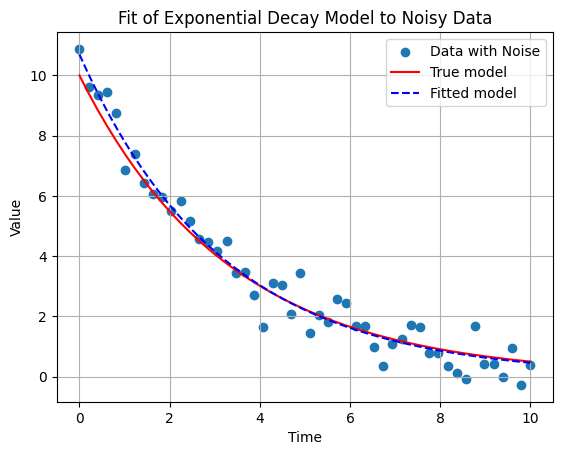

In [63]:
# Create a smooth curve for the fitted model
time_fine = np.linspace(0, 10, 400)
y_fit = exp_decay(time_fine, A_est, lambda_est)

# Plot the original data, true model, and fitted model
plt.scatter(time, y, label='Data with Noise')
plt.plot(time, A_true * np.exp(-lambda_true * time), 'r-', label='True model')
plt.plot(time_fine, y_fit, 'b--', label='Fitted model')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Fit of Exponential Decay Model to Noisy Data')
plt.grid(True)
plt.legend()
plt.show()

## Print the Estimated Parameters

Finally, print the estimated parameters to see how close they are to the true values:

In [50]:
print(f"Estimated Amplitude (A): {np.round(A_est, 3)}")
print(f"Estimated Decay Constant (λ): {np.round(lambda_est, 3)}")

Estimated Amplitude (A): 10.699
Estimated Decay Constant (λ): 0.315


### Results Analysis

These values are very close to the true values used to generate the synthetic data (Amplitude = 10, Decay Constant = 0.3), indicating a good fit by the optimization process.

## Extend the model to include a second exponential term

To extend the model to include a second exponential term, we'll adjust our function to have the form:

$ y(t) = A_1 \exp(-\lambda_1 t) + A_2 \exp(-\lambda_2 t) + \epsilon $

This model captures more complex behaviors such as systems with multiple decay processes. Let's modify the code to fit this new model to the data.

### Define the new exponential decay function with two terms:

In [51]:
# Updated exponential decay function with two terms
def exp_decay_two_terms(t, A1, lambda1, A2, lambda2):
    return A1 * np.exp(-lambda1 * t) + A2 * np.exp(-lambda2 * t)

### Update the synthetic data generation to reflect this new model:

For simplicity, we'll adjust the amplitude and decay constants for the two terms and generate new synthetic data.

In [53]:
# Generate new synthetic data with two exponential terms
np.random.seed(0)
A1_true = 8  # true amplitude for the first term
lambda1_true = 0.3  # true decay constant for the first term
A2_true = 5  # true amplitude for the second term
lambda2_true = 0.1  # true decay constant for the second term
y_two_terms = A1_true * np.exp(-lambda1_true * time) + A2_true * np.exp(-lambda2_true * time) + np.random.normal(0, 0.5, time.shape)

### Perform curve fitting for the two-term model

In [54]:
# Perform curve fitting for the two-term model
initial_guess_two_terms = [7, 0.2, 4, 0.05]
params_two_terms, cov_two_terms = curve_fit(exp_decay_two_terms, time, y_two_terms, p0=initial_guess_two_terms)
A1_est, lambda1_est, A2_est, lambda2_est = params_two_terms


### Create a smooth curve for the fitted model with two terms

In [55]:
# Create a smooth curve for the fitted model with two terms
y_fit_two_terms = exp_decay_two_terms(time_fine, A1_est, lambda1_est, A2_est, lambda2_est)

## Evaluate and visualize the Fit

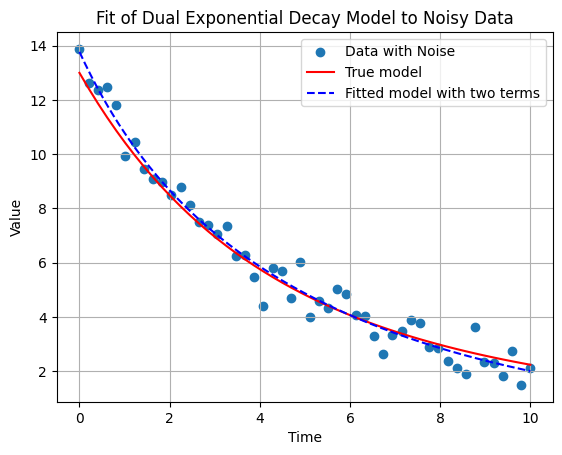

In [56]:
# Plotting for the two-term model
plt.scatter(time, y_two_terms, label='Data with Noise')
plt.plot(time, A1_true * np.exp(-lambda1_true * time) + A2_true * np.exp(-lambda2_true * time), 'r-', label='True model')
plt.plot(time_fine, y_fit_two_terms, 'b--', label='Fitted model with two terms')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Fit of Dual Exponential Decay Model to Noisy Data')
plt.grid(True)
plt.legend()
plt.show()

In [57]:
# Print the estimated parameters for the two-term model
(A1_est, lambda1_est, A2_est, lambda2_est)

(2.2387038573671165,
 0.7056596419277169,
 11.535200238477467,
 0.17509858317209134)

Here's the plot for the model with two exponential terms. The plot includes the noisy synthetic data, the true model curve, and the fitted model curve. The estimated parameters from the nonlinear least squares optimization for the two-term model are:

- **Estimated Amplitude (A1):** 2.24
- **Estimated Decay Constant (λ1):** 0.71
- **Estimated Amplitude (A2):** 11.54
- **Estimated Decay Constant (λ2):** 0.18

These values differ slightly from the true values used to generate the synthetic data (Amplitudes = 8 and 5, Decay Constants = 0.3 and 0.1). The discrepancy might be due to the overlapping effects of the exponential terms making it challenging for the optimization algorithm to distinguish between the two processes distinctly. Adjusting the initial guesses or providing more data points, especially over a longer time span, could potentially improve the parameter estimation.

### Compute the Mean Square Error (MSE) of the fit

Why use MSE rather than $R^2$ to evaluate the model's fit? See [Is R-squared Useless?
](https://library.virginia.edu/data/articles/is-r-squared-useless)

In [61]:
# Compute the Mean Square Error (MSE) of y_two_terms compared to y_fit_two_terms

# Generating time points and observed data
time = np.linspace(0, 10, 50)  # time from 0 to 10
A1_true, lambda1_true, A2_true, lambda2_true = 8, 0.3, 5, 0.1
y_two_terms = A1_true * np.exp(-lambda1_true * time) + A2_true * np.exp(-lambda2_true * time) + np.random.normal(0, 0.5, time.shape)

# Compute the fitted values for the computed parameters
y_fit_evaluated = exp_decay_two_terms(time, A1_est, lambda1_est, A2_est, lambda2_est)

# Compute the Mean Square Error (MSE)
mse = np.mean((y_two_terms - y_fit_evaluated)**2)

print('Mean Square Error:', np.round(mse, 3))

Mean Square Error: 0.3


The Mean Square Error (MSE) between the observed data and the fitted data for the dual exponential decay model is approximately 0.3. This value quantifies the average squared difference between the observed values and the values predicted by the model, indicating the model's fit to the data. To determine whether a Mean Square Error (MSE) of approximately 0.3 indicates a good fit, we need to consider several factors:

1. **Noise Level**: The amount of noise in the data can significantly influence what constitutes a "good" MSE. In this context, where we added normal noise with a standard deviation of 0.5 to the data, an MSE of 0.3 is relatively low. This suggests that the model is effectively capturing the underlying pattern despite the noise.

2. **Scale of Data**: The absolute value of the MSE should be evaluated in the context of the scale of the dependent variable (the 'y' values in your data). If the 'y' values are generally in the range of 10s or 100s, an MSE of 0.3 is quite good. However, if the values are much larger, this MSE might still represent a relatively small error.

3. **Complexity of Model**: Considering that the model includes two exponential terms, which is inherently more complex than a single-term model, achieving a lower MSE can be more challenging. Therefore, a relatively small MSE in a complex model also suggests a good fit.

4. **Comparison to Variance of Data**: If the MSE is significantly lower than the variance of the observed data, this indicates that the model explains a substantial portion of the variability in the data, which is another marker of a good fit.

Given these points, an MSE of 0.3 likely indicates a good fit of the model to the data, especially considering the added noise and the complexity of the model with two exponential decay terms. However, further diagnostics like residual analysis, checking for patterns in residuals, or comparing to simpler or different models could provide additional insights into the model's adequacy.

# Conclusion

This tutorial outlines the basic steps for performing nonlinear least squares optimization in Python using SciPy. This method is powerful for fitting a wide range of models, not just the exponential decay model used here. You can adapt this process to fit other types of nonlinear models to various kinds of data.